In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np
from tqdm import tqdm

In [2]:
column0 = 'IID'
column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [3]:
def one_quarter(column, year, quarter):
    
    df1 = df[(df['year'] == year) & (df['quarter'] == quarter)]
    sum = df1[column].sum()

    df2 = df1.sort_values(by=column, ascending=False)
    df_A = pd.DataFrame()
    df_B = pd.DataFrame()
    df_C = pd.DataFrame()
    
    i1 = 1
    while (df2[column][0:i1].sum() <= 0.8 * sum):
        i1 += 1
    df_A = pd.concat([df_A, df2.iloc[:i1]])

    i2 = i1 + 1
    while (df2[column][i1:i2].sum() <= 0.15 * sum):
        if i2 == i1 + 1:
            df_B = pd.concat([df_B, df2.iloc[:0]])
        i2 += 1
    df_B = pd.concat([df_B, df2.iloc[i1:i2]])

    i3 = i2 + 1
    while (df2[column][i3:i3 + 1].sum() != 0):
        if i3 == i2 + 1:
            df_C = pd.concat([df_C, df2.iloc[:0]])  
        i3 += 1
    df_C = pd.concat([df_C, df2.iloc[i2:i3]])
    
    print("A: " + str(df_A[column0].size))
    print("B: " + str(df_B[column0].size))
    print("C: " + str(df_C[column0].size))
    return df2, df_A, df_B, df_C
        

In [4]:
year = 2021
quarter = 3
df_income, df_income_A, df_income_B, df_income_C = one_quarter(column=column1, year=year, quarter=quarter)
df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C = one_quarter(column=column2, year=year, quarter=quarter)
df_employee, df_employee_A, df_employee_B, df_employee_C = one_quarter(column=column3, year=year, quarter=quarter)
df_taxes, df_taxes_A, df_taxes_B, df_taxes_C = one_quarter(column=column4, year=year, quarter=quarter)
#one_quarter(column=column5, year=year, quarter=quarter)

A: 764
B: 1565
C: 6851
A: 93
B: 185
C: 935
A: 3377
B: 7646
C: 22963
A: 1399
B: 4271
C: 30577


In [5]:
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)
    
format_number = t.FuncFormatter(format_number)

In [6]:
def plot_normal(df_param, df_param_A, df_param_B, df_param_C, column, phrase, divider):
    x = [i for i in range(0, df_param[column0].size)]
    y = []
    sum = 0
    for i in df_param[column0]:
        if i != 0:
            sum += df_param[df_param[column0] == i][column].item() / divider
        y.append(sum)
    
    figure, ax = plt.subplots()
    ax.set_ylabel(phrase, rotation='horizontal')
    ax.set_xlabel('N')
    ax.yaxis.set_label_coords(0.03, 1.03)
    ax.xaxis.set_label_coords(1.01, -0.04)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.plot(x, y, color='blue', markersize=3.)
    A = df_param_A[column0].size
    B = df_param_B[column0].size + A
    C = df_param_C[column0].size + B
    plt.vlines(x = A, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.vlines(x = B, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.vlines(x = C, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = A, y = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = B, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.grid()
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.show()

    return figure

In [7]:
def plot_log(df_param, df_param_A, df_param_B, df_param_C, column, phrase, divider):
    x = [i for i in range(0, df_param[column0].size)]
    y = []
    sum = 0
    for i in df_param[column0]:
        if i != 0:
            sum += df_param[df_param[column0] == i][column].item() / divider
        y.append(sum)
    
    figure, ax = plt.subplots()
    ax.set_ylabel(phrase, rotation='horizontal')
    ax.set_xlabel('N')
    ax.yaxis.set_label_coords(0.03, 1.03)
    ax.xaxis.set_label_coords(1.01, -0.04)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xscale('log', base = 10)
    ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
    ax.xaxis.set_major_formatter(format_number)
    ax.plot(x, y, color='blue', markersize=3.)
    A = df_param_A[column0].size
    B = df_param_B[column0].size + A
    C = df_param_C[column0].size + B
    plt.vlines(x = A, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.vlines(x = B, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.vlines(x = C, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = A, y = y[A], color='#b40000', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = B, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
    plt.hlines(xmin = 0, xmax = C, y = y[C], color='#007800', linestyles='--', linewidth=1)
    plt.grid()
    plt.xlim(xmin=1)
    plt.ylim(ymin=0)
    plt.show()

    return figure

INCOME


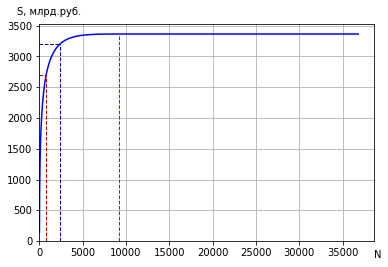

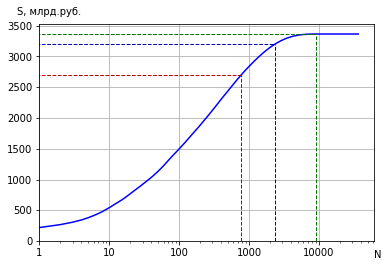

INCOME_LIC


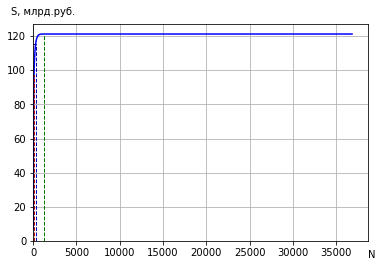

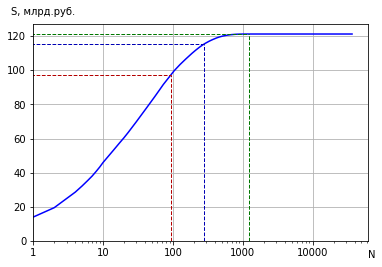

EMPLOYEE_NUM


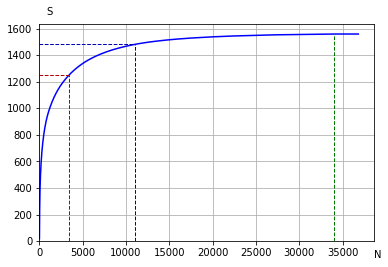

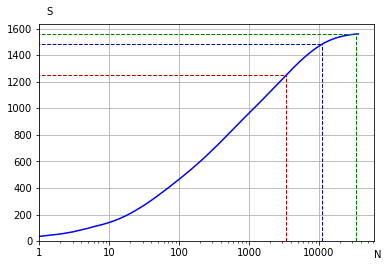

TAXES


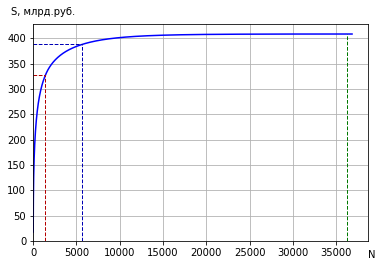

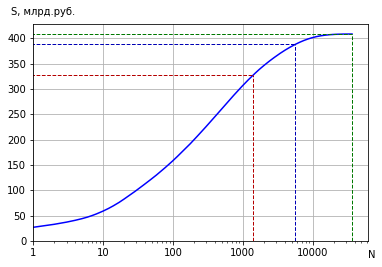

In [8]:
print("INCOME")
figure = plot_normal(df_income, df_income_A, df_income_B, df_income_C, column1, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.eps', format='eps')
figure = plot_log(df_income, df_income_A, df_income_B, df_income_C, column1, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log2.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log2.eps', format='eps')

print("INCOME_LIC")
figure = plot_normal(df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C, column2, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3.eps', format='eps')
figure = plot_log(df_income_liс, df_income_liс_A, df_income_liс_B, df_income_liс_C, column2, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3-log2.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income_lic-2021Q3-log2.eps', format='eps')

print("EMPLOYEE_NUM")
figure = plot_normal(df_employee, df_employee_A, df_employee_B, df_employee_C, column3, phrase='S', divider=1e3)
figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3.eps', format='eps')
figure = plot_log(df_employee, df_employee_A, df_employee_B, df_employee_C, column3, phrase='S', divider=1e3)
figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3-log2.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Employee_num-2021Q3-log2.eps', format='eps')

print("TAXES")
figure = plot_normal(df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, column4, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2021Q3.eps', format='eps')
figure = plot_log(df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, column4, phrase='S, млрд.руб.', divider=1e9)
figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2021Q3-log2.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Taxes-2021Q3-log2.eps', format='eps')

In [31]:
def magic_square(x, y, df, df_A, df_B, df_C, x_label, y_label):
    df_D = pd.DataFrame()
    df_D = pd.concat([df_D, df.iloc[(df_A[column0].size + df_B[column0].size + df_C[column0].size):df[column0].size]])
    
    x_A = list(df_A[x])
    y_A = list(df_A[y])
    for i in range(len(y_A)):
        y_A[i] /= 1e6
        if x_label == y_label:
            x_A[i] /= 1e6
        
    x_B = list(df_B[x])
    y_B = list(df_B[y])
    for i in range(len(y_B)):
        y_B[i] /= 1e6
        if x_label == y_label:
            x_B[i] /= 1e6
        
    x_C = list(df_C[x])
    y_C = list(df_C[y])
    for i in range(len(y_C)):
        y_C[i] /= 1e6
        if x_label == y_label:
            x_C[i] /= 1e6
        
    x_D = list(df_D[x])
    y_D = list(df_D[y])
    for i in range(len(y_D)):
        y_D[i] /= 1e6
        if x_label == y_label:
            x_D[i] /= 1e6

    figure, ax = plt.subplots()
    ax.set_ylabel(y_label, rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_xscale('log', base = 10)
    ax.set_yscale('log', base = 10)
    ax.yaxis.set_label_coords(0.03, 1.02)
    ax.xaxis.set_label_coords(1.01, -0.04)
    if x_label == y_label:
        ax.set_xticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
        ax.xaxis.set_label_coords(1.07, -0.05)
    ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 1000000])
    ax.yaxis.set_major_formatter(format_number)
    ax.xaxis.set_major_formatter(format_number)
    ax.scatter(x_A, y_A, s=1, color='#b40000')
    ax.scatter(x_B, y_B, s=1, color='#0000b4')
    ax.scatter(x_C, y_C, s=1, color='#007800')
    ax.scatter(x_D, y_D, s=1, color='black')
    plt.grid()
    plt.show()
    
    return figure

INCOME/EMPLOYEE_NUM (TAXES)


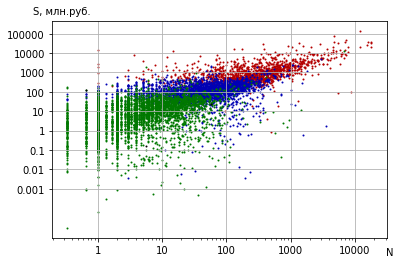

INCOME_LIC/EMPLOYEE_NUM (TAXES)


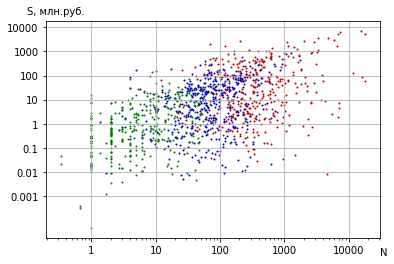

TAXES/EMPLOYEE_NUM (INCOME)


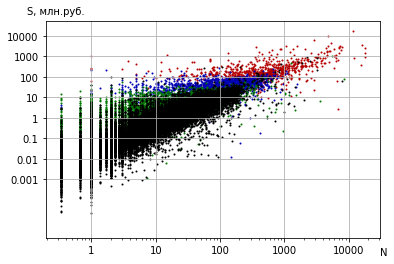

INCOME/TAXES (EMPLOYEE_NUM)


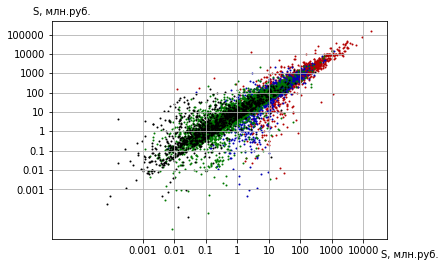

In [32]:
print("INCOME/EMPLOYEE_NUM (TAXES)")
figure = magic_square(column3, column1, df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, x_label='N', y_label='S, млн.руб.')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.eps', format='eps')

print("INCOME_LIC/EMPLOYEE_NUM (TAXES)")
figure = magic_square(column3, column2, df_taxes, df_taxes_A, df_taxes_B, df_taxes_C, x_label='N', y_label='S, млн.руб.')
figure.savefig('./ABC(MQ)/QUA-Income_lic-Staff-fromTaxes-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income_lic-Staff-fromTaxes-2021Q3-log2.eps', format='eps')

print("TAXES/EMPLOYEE_NUM (INCOME)")
figure = magic_square(column3, column4, df_income, df_income_A, df_income_B, df_income_C, x_label='N', y_label='S, млн.руб.')
figure.savefig('./ABC(MQ)/QUA-Taxes-Staff-fromInclome-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Taxes-Staff-fromInclome-2021Q3-log2.eps', format='eps')

print("INCOME/TAXES (EMPLOYEE_NUM)")
figure = magic_square(column4, column1, df_employee, df_employee_A, df_employee_B, df_employee_C, x_label='S, млн.руб.', y_label='S, млн.руб.')
figure.savefig('./ABC(MQ)/QUA-Income-Taxes-fromStaff-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Taxes-fromStaff-2021Q3-log2.eps', format='eps')

# Не строить по горизонтали Income